# Initial setup

Imports and reading dataset

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt
from scipy.stats import skew
            
%matplotlib inline     
sns.set(color_codes=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
data = pd.read_csv("../data/raw/housePricing.csv")
output_dir_plot = "../plots/eda"
os.makedirs(output_dir_plot, exist_ok=True)

# Initial analysis

Taking a first look

In [28]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Basic functions - checking shape , column names, duplicated data and unique values per columns.

In [29]:
print('Shape of the data:',data.shape)
print("\n****************************\n")
print('Columns of the data:',data.columns)
print("\n****************************\n")
print('Number of unique values:\n',data.nunique())
print("\n****************************\n")
print('\nNumber of duplicated values:',data.duplicated().sum())

Shape of the data: (1460, 81)

****************************

Columns of the data: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodD

Learning data types and how many non-null values there are in columns

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Statistical summary of the dataset

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Dropping the id column for a cleaner EDA. I will also change some non-numeric predictors that are stored as numbers such as YrSold, MoSold and MSSubClass

In [32]:
data = data.drop('Id', axis=1)
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

# Numerical data analysis

## Distribution of numerical data showing skewness

There are 2 types of data for numerical columns: Continuous (LotArea, GrLivArea, etc.) and Discrete(OverallQual, HalfBath, etc.). I will only show the disctribution for continuous numerical data because this has the highest impact

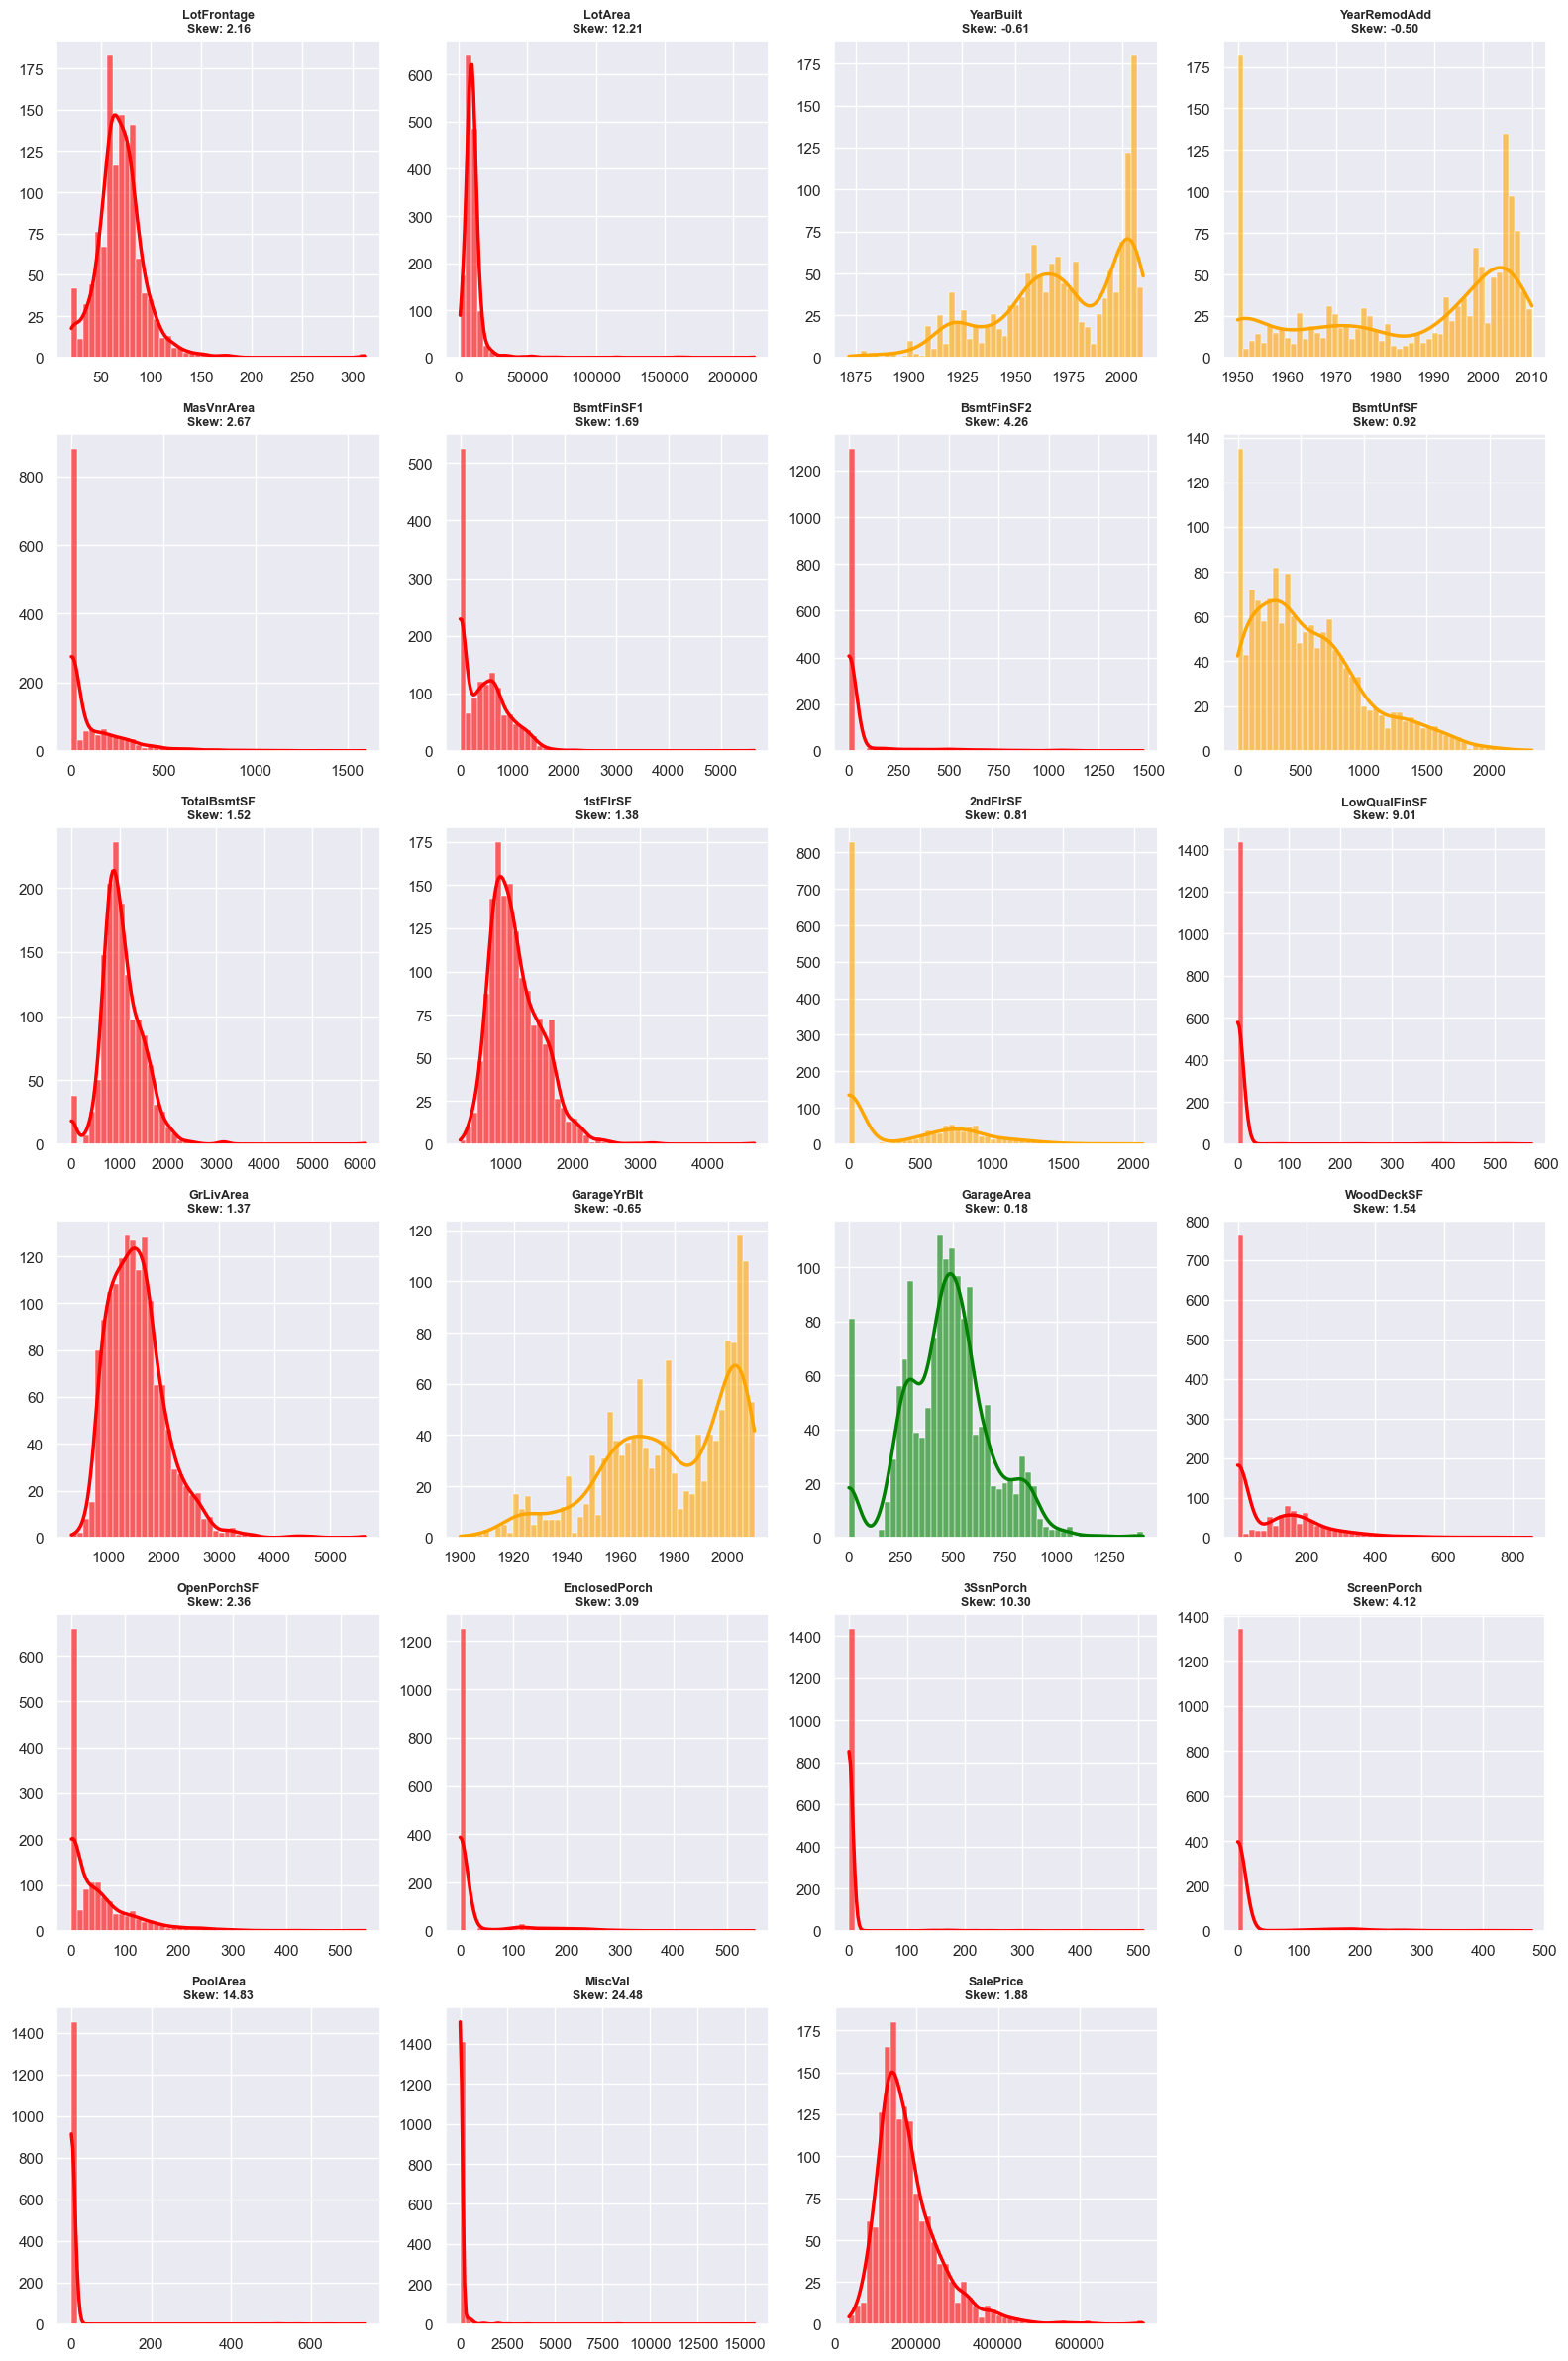

In [33]:
df_num = data.select_dtypes(include = ['float64', 'int64'])

disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

cont_num_var = []
for i in df_num.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)

cols_to_plot = [col for col in cont_num_var if col in data.columns]
rows = len(cols_to_plot) // 4 + 1
fig = plt.figure(figsize=(16, rows * 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(rows, 4, i + 1)
    
    skewness = df_num[col].skew()
    
    if abs(skewness) > 1:
        color = 'red'
    elif abs(skewness) > 0.5:
        color = 'orange'
    else:
        color = 'green' 
    sns.histplot(data=df_num, x=col, kde=True, bins=50, 
                 color=color, alpha=0.6, line_kws={'linewidth': 2.5, 'color': 'black'})
    
    plt.title(f'{col}\nSkew: {skewness:.2f}', fontsize=9, weight='bold')
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
save_path = os.path.join(output_dir_plot, "Numerical_Distribution_Skewness.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

## Visualizing the correlations between numerical variables

Correlation heatmap for raw data

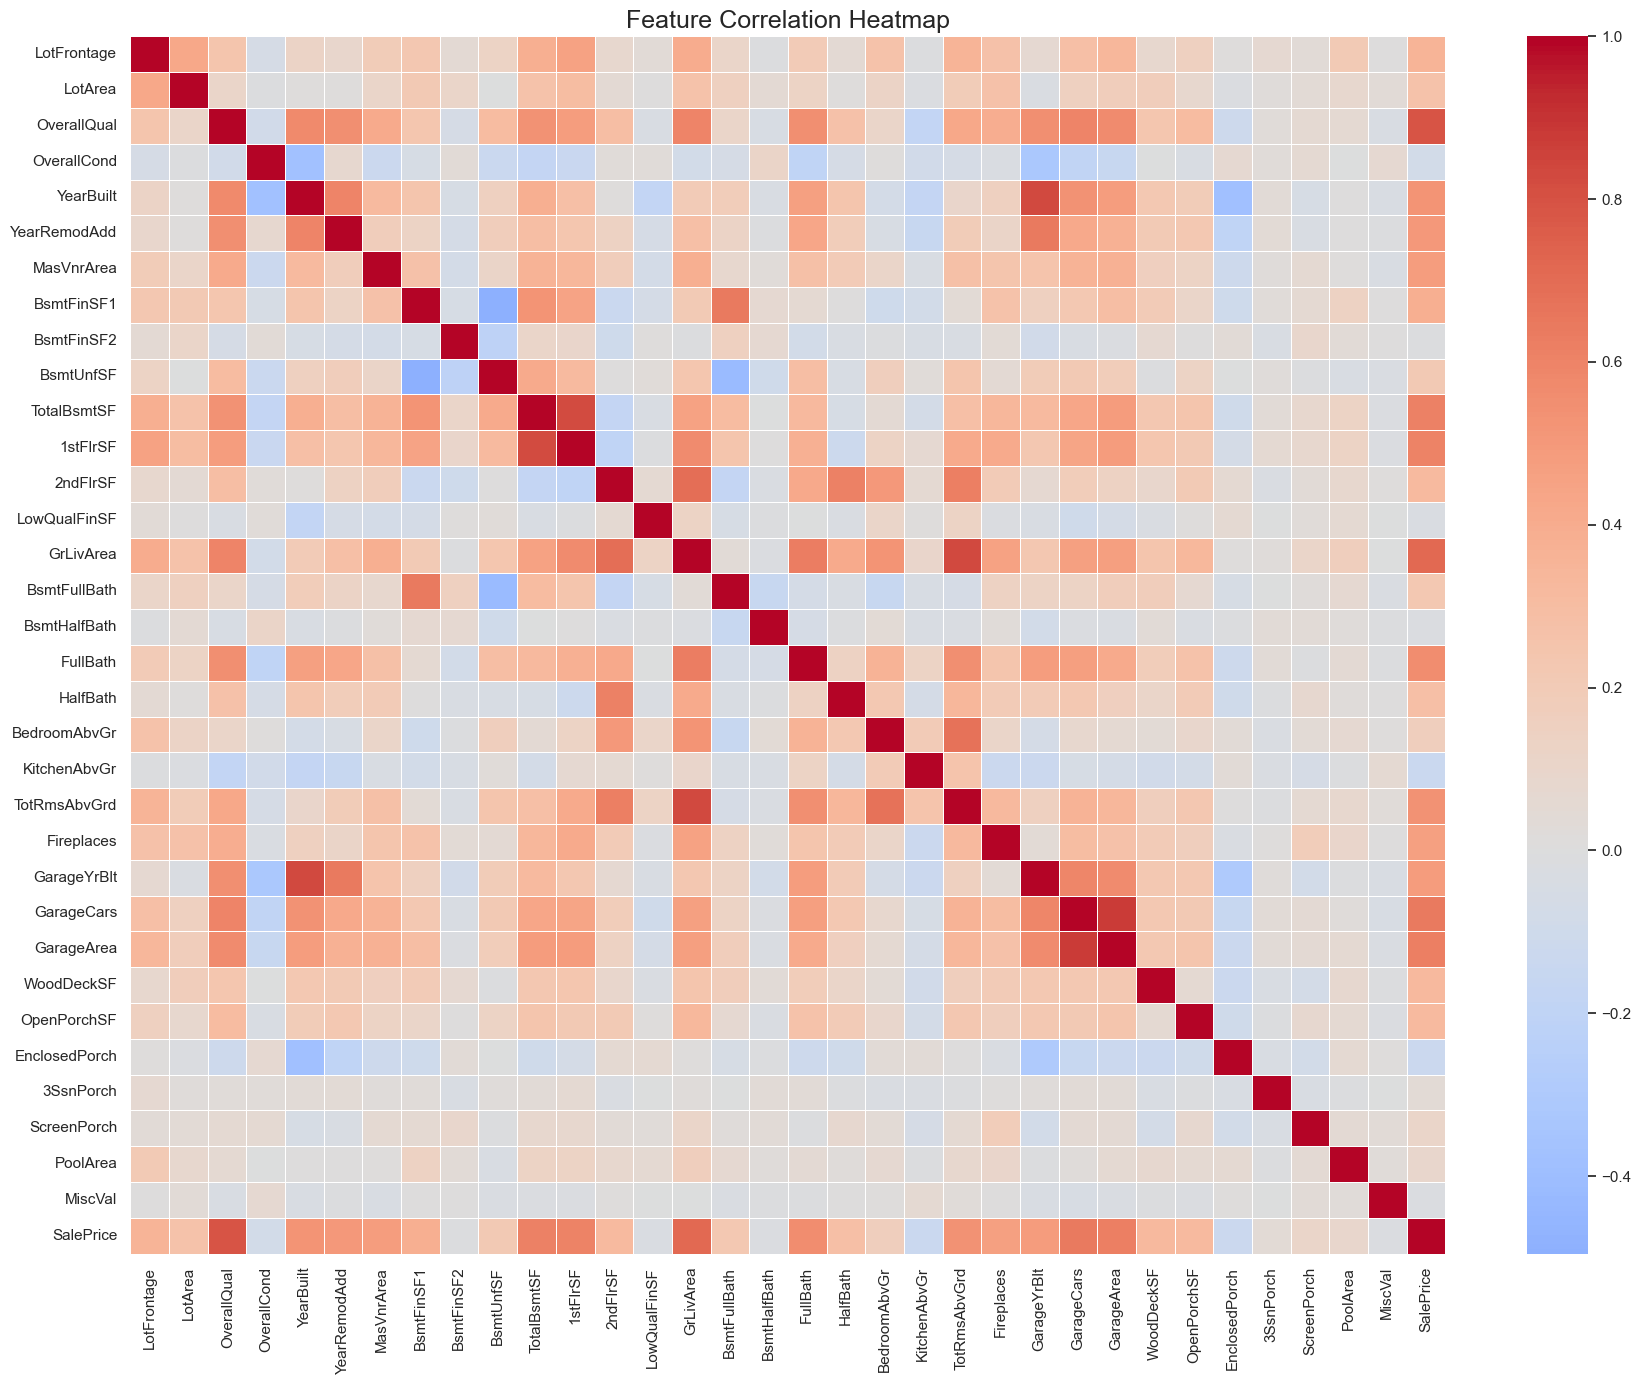

In [34]:
correlation_matrix = df_num.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Feature Correlation Heatmap', fontsize=18)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
save_path = os.path.join(output_dir_plot, "Correlation_Heatmap.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Categorical data analysis

Distribution of  categorical data

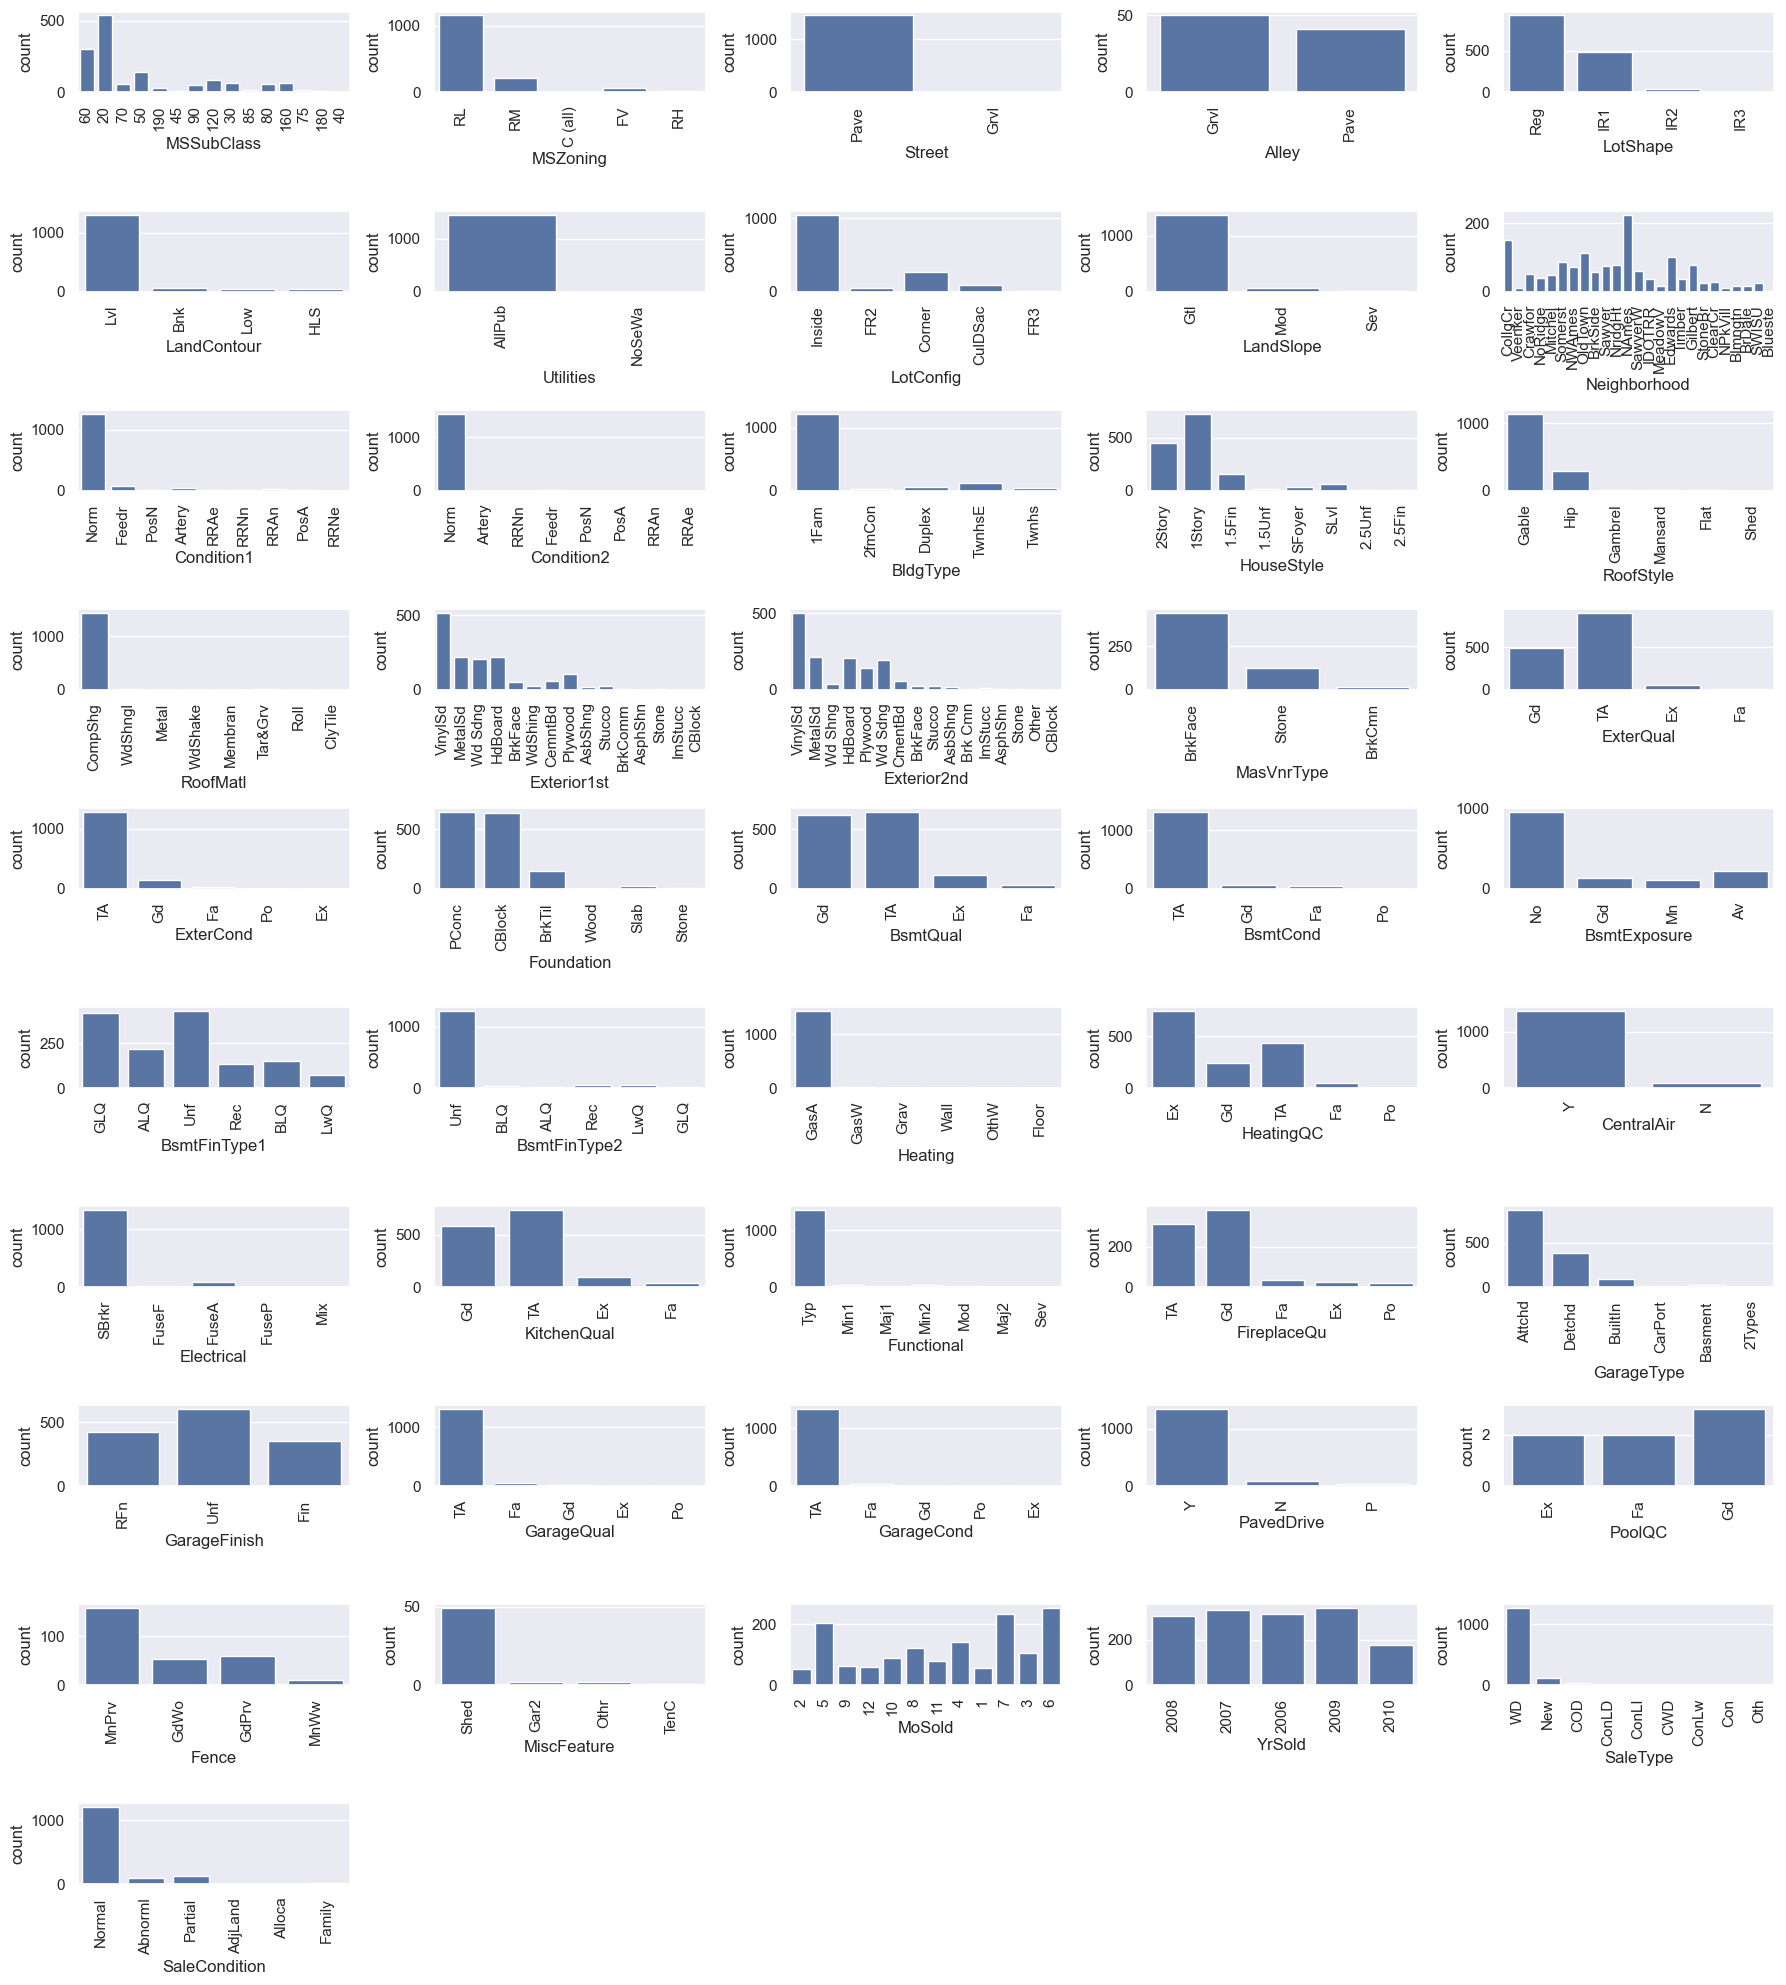

In [35]:
df_cat = data.select_dtypes(include = ['object'])

fig = plt.figure(figsize=(18,20))
for index in range(len(df_cat.columns)):
    plt.subplot(10,5,index+1)
    sns.countplot(x=df_cat.iloc[:,index], data=df_cat)
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)
save_path = os.path.join(output_dir_plot, "Categorical_Distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Using boxplots to see the relationship between salePrice and categorical data

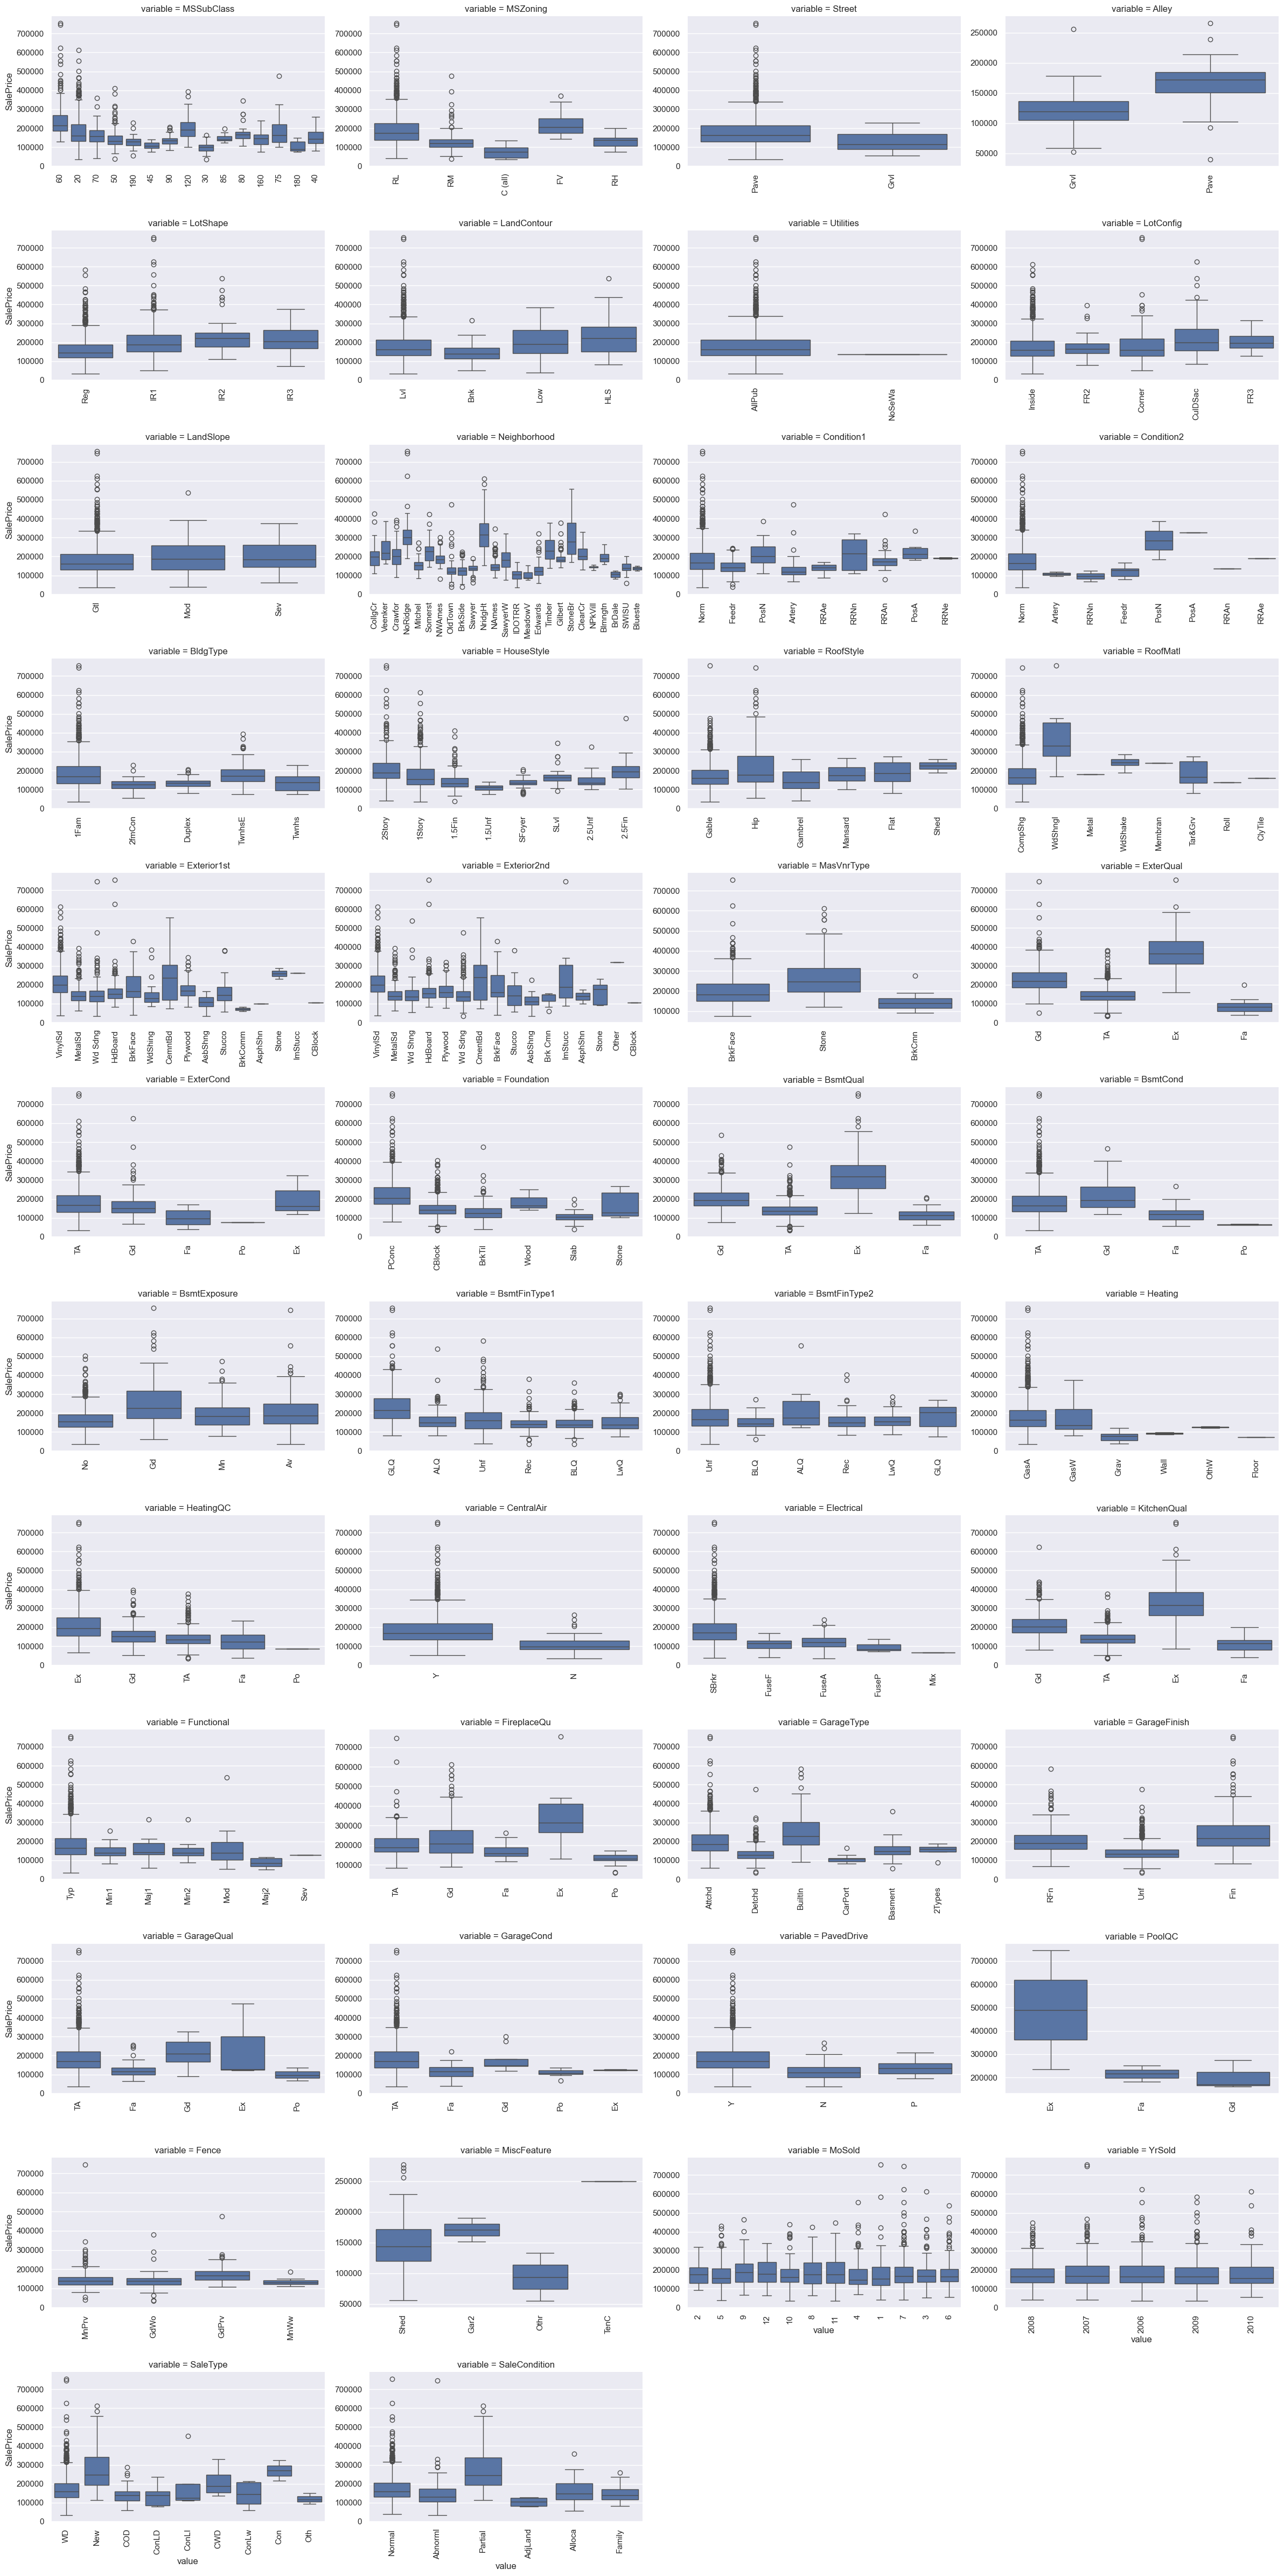

In [36]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['SalePrice'], value_vars=df_cat.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=4, aspect=1.5)
g = g.map(boxplot, "value", "SalePrice")
save_path = os.path.join(output_dir_plot, "Categorical_vs_SalePrice_Boxplots.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Data processing

## Removing redundant features

I will remove feature with multicollinearity. From the matrix above we can pinpoint certain features with above 80% collinearity. These are :
    GarageYrBlt and YearBuilt,
    TotRmsAbvGrd and GrLivArea,
    GarageArea and GarageCars

In [37]:
data.drop(['GarageYrBlt','TotRmsAbvGrd','GarageCars'], axis=1, inplace=True)

## Detecting outliers

I will use boxplots to detect outliers within numerical features

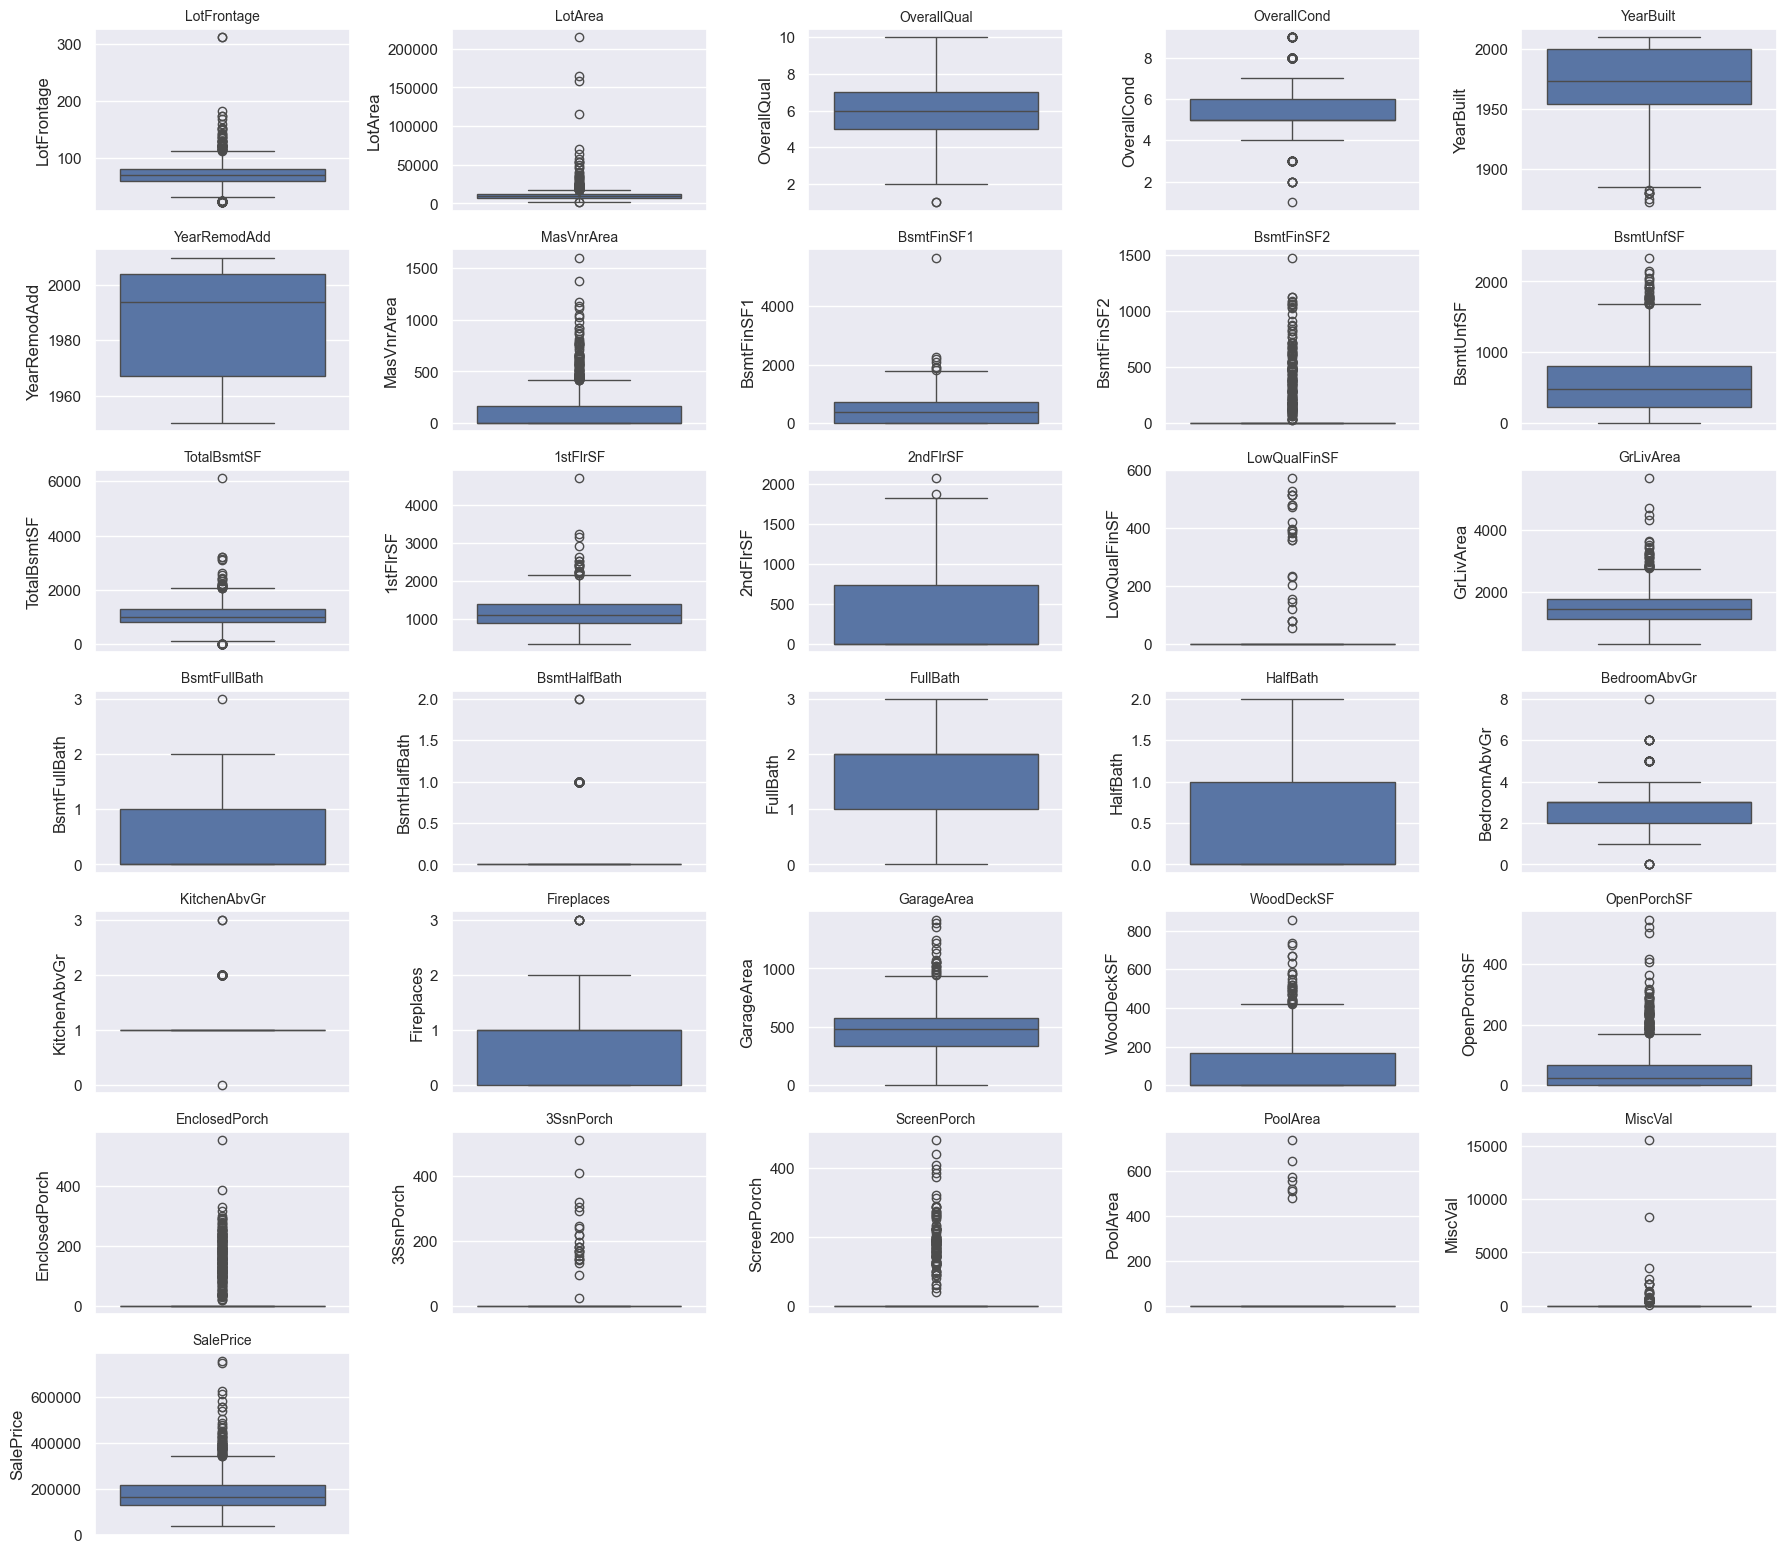

In [38]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
fig = plt.figure(figsize=(18, 20))
for index, col in enumerate(df_num.columns):
    plt.subplot(9, 5, index + 1)
    sns.boxplot(y=col, data=df_num)
    plt.title(col, fontsize=10)
fig.tight_layout(pad=1.0)
save_path = os.path.join(output_dir_plot, "Outlier_Detection_Boxplots.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

There are a few extreme outliers in features like lotFrontage, lotArea and GrLivArea. I will simply remove them because i dont want to change a lot off data by using IQR method.

In [39]:
data = data.drop(data[data['LotFrontage'] > 200].index)
data = data.drop(data[data['LotArea'] > 100000].index)
data = data.drop(data[data['BsmtFinSF1'] > 4000].index)
data = data.drop(data[data['TotalBsmtSF'] > 5000].index)
data = data.drop(data[data['GrLivArea'] > 4000].index)

## Missing values

In [40]:
def missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
    missing_data = missing_data[missing_data['Total Missing'] > 0]
    return missing_data

missing_data_table(data)

,Total Missing,Percent
PoolQC,1446,99.655410
MiscFeature,1399,96.416265
Alley,1360,93.728463
Fence,1171,80.702963
MasVnrType,868,59.820813
FireplaceQu,690,47.553411
LotFrontage,256,17.643005
GarageType,81,5.582357
GarageFinish,81,5.582357
GarageCond,81,5.582357


I will deal with these missing values by filling them in insted of removing the columns.

In [41]:
data['PoolQC'] = data['PoolQC'].fillna('None')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('None')
data['Fence'] = data['Fence'].fillna('None')
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    data[col] = data[col].fillna('None')

data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

missing_data_table(data)

,Total Missing,Percent


## Fixing skewness

I only need to fix skewness for continuous numerical data. I will do this by using log or sqrt depending on the outcome. I will not transform if any of these 2 are worst.

In [42]:
df_num = data.select_dtypes(include = ['float64', 'int64'])

disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

cont_num_var = []
for i in df_num.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)
skewed_feats = data[cont_num_var].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_threshold = 0.75
high_skew_feats = skewed_feats[abs(skewed_feats) > skewness_threshold]

for feat in high_skew_feats.index:
    original_data = data[feat]
    log_data = np.log1p(data[feat])
    sqrt_data = np.sqrt(data[feat])
    
    old_skew = skew(original_data.dropna())
    log_skew = skew(log_data.dropna())
    sqrt_skew = skew(sqrt_data.dropna())

    results = {
        'Original': abs(old_skew),
        'Log': abs(log_skew),
        'Sqrt': abs(sqrt_skew)
    }
    
    best_method = min(results, key=results.get)
    
    if best_method == 'Log':
        data[feat] = log_data
        print(f"{feat}: Log ({old_skew:.2f} -> {log_skew:.2f})")
    elif best_method == 'Sqrt':
        data[feat] = sqrt_data
        print(f"{feat}: Sqrt ({old_skew:.2f} -> {sqrt_skew:.2f}) - Better than Log!")
    else:
        print(f"{feat}: Skipped (Kept at {old_skew:.2f}) - Transforms made it worse")


MiscVal: Log (24.44 -> 5.27)
PoolArea: Log (17.47 -> 16.96)
3SsnPorch: Log (10.26 -> 7.70)
LowQualFinSF: Log (8.97 -> 7.43)
BsmtFinSF2: Log (4.27 -> 2.53)
ScreenPorch: Log (4.10 -> 3.13)
LotArea: Log (3.98 -> -0.73)
EnclosedPorch: Log (3.07 -> 2.10)
MasVnrArea: Log (2.67 -> 0.51)
OpenPorchSF: Log (2.34 -> -0.02)
SalePrice: Log (1.58 -> 0.07)
WoodDeckSF: Log (1.53 -> 0.16)
BsmtUnfSF: Sqrt (0.92 -> -0.25) - Better than Log!
1stFlrSF: Log (0.87 -> -0.00)
GrLivArea: Log (0.84 -> -0.11)
2ndFlrSF: Log (0.77 -> 0.29)
BsmtFinSF1: Sqrt (0.75 -> -0.09) - Better than Log!


We can see that our target (SalePrice) was also fixed so we dont have to do it separately.

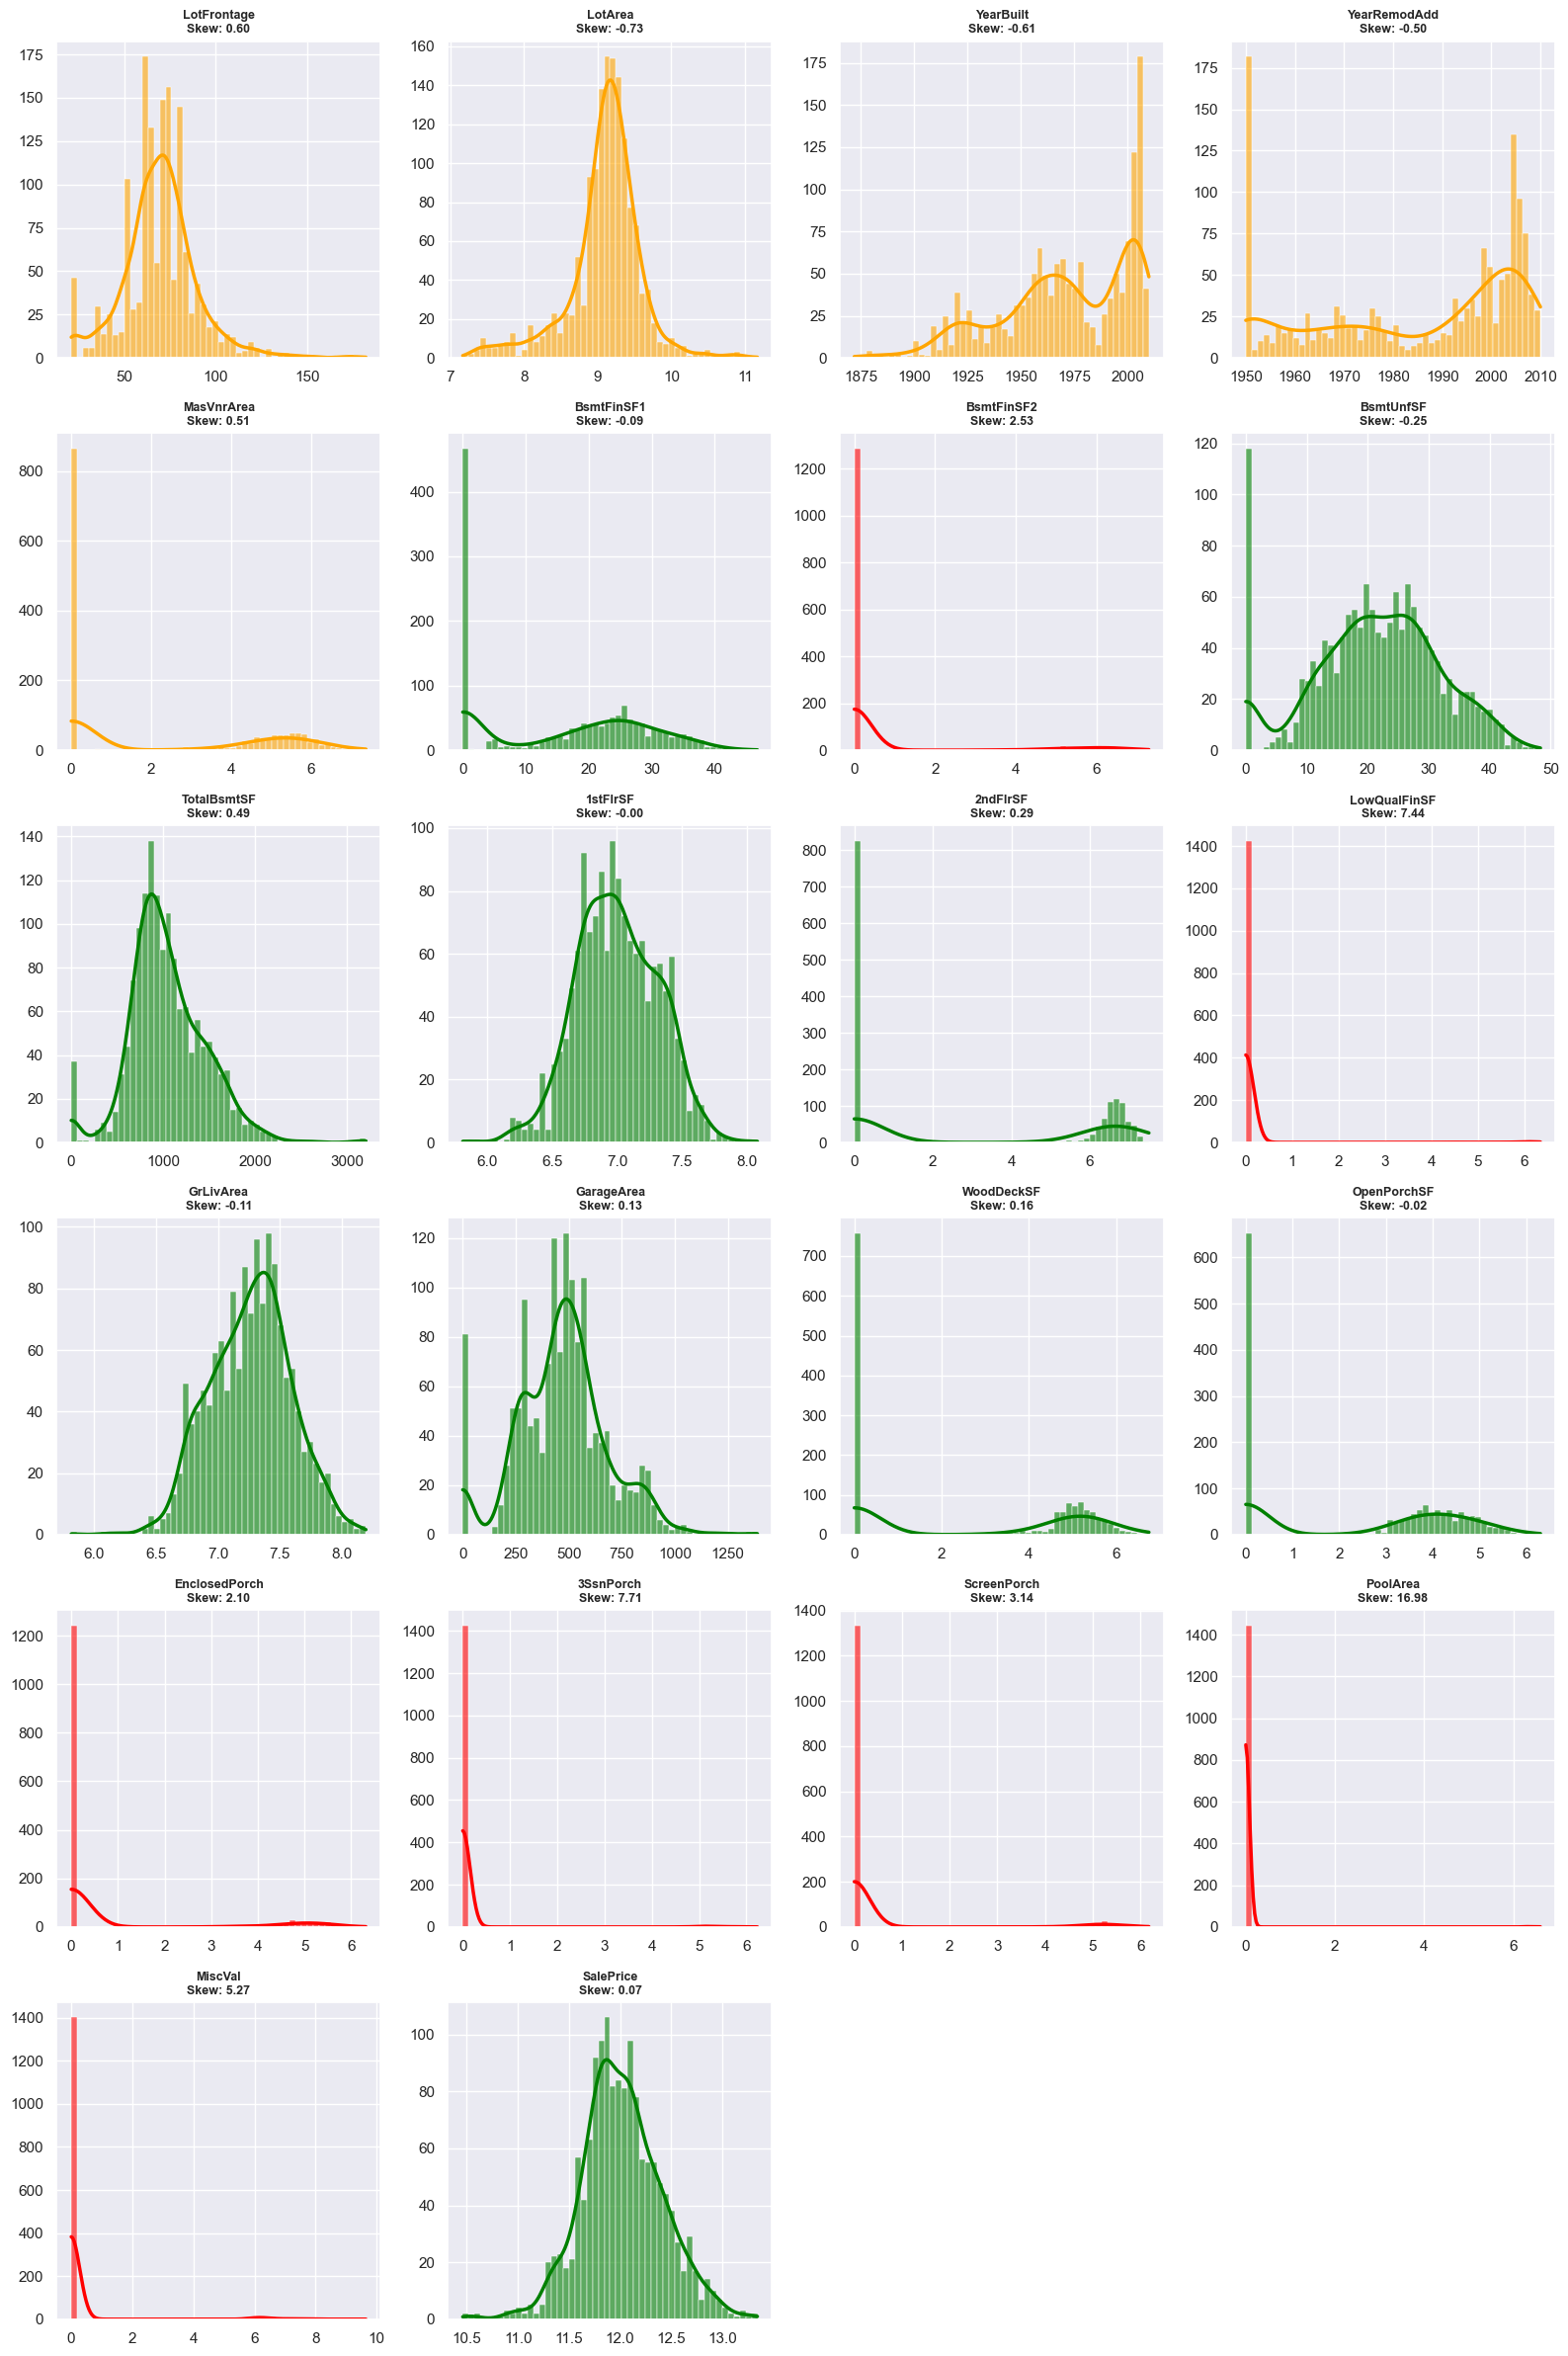

In [43]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
cols_to_plot = [col for col in cont_num_var if col in data.columns]
rows = len(cols_to_plot) // 4 + 1
fig = plt.figure(figsize=(16, rows * 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(rows, 4, i + 1)
    
    skewness = df_num[col].skew()
    
    if abs(skewness) > 1:
        color = 'red'
    elif abs(skewness) > 0.5:
        color = 'orange'
    else:
        color = 'green' 
    sns.histplot(data=df_num, x=col, kde=True, bins=50, 
                 color=color, alpha=0.6, line_kws={'linewidth': 2.5, 'color': 'black'})
    
    plt.title(f'{col}\nSkew: {skewness:.2f}', fontsize=9, weight='bold')
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
save_path = os.path.join(output_dir_plot, "Numerical_Distribution_After_Transform.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Feature engineering

I will log some of the numerical features that weren't skewed and didn't get the chance to be logged

In [44]:
area_features = ['TotalBsmtSF', 'GarageArea', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'LotArea', 'TotalSF', 'LotFrontage']

for col in area_features:
    if col in data.columns:
        if data[col].max() > 50: 
            data[col] = np.log1p(data[col])
            print(f"Manual Forced Log Transform: {col}")

Manual Forced Log Transform: TotalBsmtSF
Manual Forced Log Transform: GarageArea
Manual Forced Log Transform: LotFrontage


I will create some new features calculated using others that may help during modeling.

In [45]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['Total_Bathrooms'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])
data['TotalPorch'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['3SsnPorch'] + data['WoodDeckSF']

I will also include some simple feature engineering by creating binary columns for some columns that indicate presence or absence of said features in the house.

In [46]:
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

## Saving cleaned data

In [47]:
output_dir = "../data/cleaned"  
filename = "housePricing_cleaned.csv"
output_path = os.path.join(output_dir, filename)

data.to_csv(output_path, index=False)
print(f"File saved to: {output_path}")

File saved to: ../data/cleaned\housePricing_cleaned.csv


## Encoding

Converting categorical data to numerical using the get_dummies method because most models can only handle numerical features

In [48]:
data = pd.get_dummies(data, drop_first=True)

Checking shape one last time

In [49]:
print('Shape of the data:',data.shape)

Shape of the data: (1451, 290)


# Saving ready for model data

In [50]:
output_dir = "../data/cleaned"  
filename = "housePricing_model.csv"
output_path = os.path.join(output_dir, filename)

data.to_csv(output_path, index=False)
print(f"File saved to: {output_path}")

File saved to: ../data/cleaned\housePricing_model.csv
